### Import modules, libraries

In [1]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

### Create loading and saving path

In [31]:
# Loading file from path
def loading_file():
    file_dir = '/home/nbuser/library/1. Classifier/2. BBC Dataset'         # Or for the absolute path: dir = os.path.dirname(os.path.realpath(__file__))
    file_list = glob.glob(file_dir + '/*.csv')
    csv_file = file_list[0]
    return csv_file

# Import file imto Pandas DataFrame
def importing_file(csv_file):
    df = pd.read_csv(csv_file, sep=",")
    return df

# Saving path
def saving_file(file, file_name, save_dir):
    file.to_csv(os.path.join(save_dir,file_name), index=False)

### Import file

In [32]:
# Importing file + Loading  file
news_df = importing_file(loading_file())

# Top 5 records
news_df.head()

,file_name,title,news_text,category
0,380.txt,Boogeyman takes box office lead\n,\nThe low-budget horror film Boogeyman has kno...,entertainment
1,011.txt,Artists' secret postcards on sale\n,\nPostcards by artists including Damien Hirst ...,entertainment
2,291.txt,U2 stars enter rock Hall of Fame\n,\nSinger Bruce Springsteen has inducted Irish ...,entertainment
3,184.txt,Top of the Pops leaves BBC One\n,\nThe BBC's flagship pop music programme Top o...,entertainment
4,037.txt,Film row over Pirates 'cannibals'\n,\nPlans to portray Dominica's Carib Indians as...,entertainment


In [33]:
news_df.category.value_counts()

sports           511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

### Cleaning data

In [34]:
import re
def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', str(x))
    return text

def clean_all_text(df):
    for column in df.columns.tolist():
        df[column] = df[column].str.replace('\n','')
    for index, item in df.iterrows():
        cleantext = clean_text(item['news_text'])
        item['news_text'] = cleantext
    missing = df.isnull().values.any()
    if missing:
        df.dropna(axis=1)
    return df

In [35]:
news_df = clean_all_text(news_df)

In [36]:
news_df.head()

,file_name,title,news_text,category
0,380.txt,Boogeyman takes box office lead,The lowbudget horror film Boogeyman has knocke...,entertainment
1,011.txt,Artists' secret postcards on sale,Postcards by artists including Damien Hirst an...,entertainment
2,291.txt,U2 stars enter rock Hall of Fame,Singer Bruce Springsteen has inducted Irish ro...,entertainment
3,184.txt,Top of the Pops leaves BBC One,The BBCs flagship pop music programme Top of t...,entertainment
4,037.txt,Film row over Pirates 'cannibals',Plans to portray Dominicas Carib Indians as ca...,entertainment


### Numbers and proportions by cateory

In [37]:
'''number_cat = news_df.groupby(['category']).count()
number_cat'''

,file_name,title,news_text
category,,,
business,510,510,510
entertainment,386,386,386
politics,417,417,417
sports,511,511,511
tech,401,401,401


In [39]:
'''# Numbers and percentage of each category
num_cat = news_df.groupby(['category']).count().reset_index()
num_cat['count category'] = num_cat['news_text']
num_cat['percent category'] = num_cat['title']/num_cat['title'].sum()
num_cat = num_cat.drop(columns=(['file_name', 'title', 'news_text']), axis=0)
num_cat'''

,category,count category,percent category
0,business,510,0.229213
1,entertainment,386,0.173483
2,politics,417,0.187416
3,sports,511,0.229663
4,tech,401,0.180225


In [40]:
#news_df['news_length'] = news_df['news_text'].str.len()

In [41]:
#news_df

,file_name,title,news_text,category,news_length
0,380.txt,Boogeyman takes box office lead,The lowbudget horror film Boogeyman has knocke...,entertainment,1056
1,011.txt,Artists' secret postcards on sale,Postcards by artists including Damien Hirst an...,entertainment,1184
2,291.txt,U2 stars enter rock Hall of Fame,Singer Bruce Springsteen has inducted Irish ro...,entertainment,2271
3,184.txt,Top of the Pops leaves BBC One,The BBCs flagship pop music programme Top of t...,entertainment,2089
4,037.txt,Film row over Pirates 'cannibals',Plans to portray Dominicas Carib Indians as ca...,entertainment,1470
5,050.txt,Willis sues over movie 'injury',Actor Bruce Willis is suing Revolution Studios...,entertainment,1533
6,077.txt,DVD review: Spider-Man 2,Its a universal rule that a film can either be...,entertainment,1816
7,299.txt,Fry set for role in Hitchhiker's,Actor Stephen Fry is joining the cast of the f...,entertainment,1369
8,183.txt,Star Trek fans fight to save show,Star Trek fans have taken out a fullpage ad in...,entertainment,1437
9,118.txt,REM concerts blighted by illness,US rock band REM have been forced to cancel co...,entertainment,1376


### Visualize categories

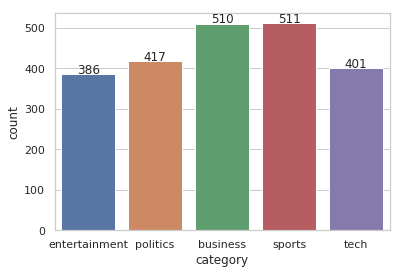

In [42]:
'''# Visualize number of each category
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.countplot(x="category", data=news_df)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')'''

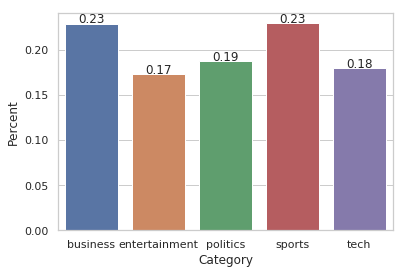

In [43]:
'''# Visualize the percentage of each category
ax = sns.barplot(x='category', y='percent category', data=num_cat)
ax.set(ylabel="Percent")
ax.set(xlabel="Category")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')'''

[Text(0, 0.5, 'Text')]

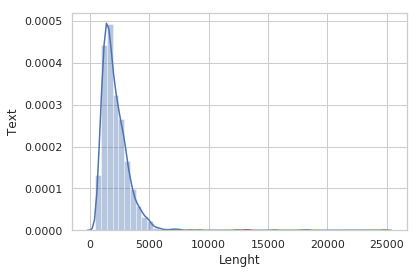

In [44]:
'''ax = sns.distplot(news_df['news_length'])
ax.set(xlabel="Lenght")
ax.set(ylabel="Text")'''

### Remove news_length column

In [45]:
#news_df = news_df.drop(columns='news_length')

In [46]:
#news_df.head()

,file_name,title,news_text,category
0,380.txt,Boogeyman takes box office lead,The lowbudget horror film Boogeyman has knocke...,entertainment
1,011.txt,Artists' secret postcards on sale,Postcards by artists including Damien Hirst an...,entertainment
2,291.txt,U2 stars enter rock Hall of Fame,Singer Bruce Springsteen has inducted Irish ro...,entertainment
3,184.txt,Top of the Pops leaves BBC One,The BBCs flagship pop music programme Top of t...,entertainment
4,037.txt,Film row over Pirates 'cannibals',Plans to portray Dominicas Carib Indians as ca...,entertainment


In [47]:
#news_df.category.value_counts()

sports           511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

### Split data vor final validation

In [48]:
news_df = news_df.sample(frac=1).reset_index(drop=True)

In [49]:
news_df_validation = news_df.iloc[:222, :]
news_df = news_df.iloc[222:, :].reset_index(drop=True)

In [50]:
'''print(news_df.shape)
print(news_df_validation.shape)
print(news_df.head(5))
print(news_df_validation.head(5))'''


(2003, 4)
(222, 4)
  file_name                                 title  \
0   333.txt           Parker misses England clash   
1   372.txt  Madagascar completes currency switch   
2   261.txt        Speech takes on search engines   
3   123.txt       Train strike grips Buenos Aires   
4   052.txt     Spike Lee backs student directors   

                                           news_text       category  
0  Tom Shanklin will start in the centre for Wale...         sports  
1  Madagascar has completed the replacement of it...       business  
2  A Scottish firm is looking to attract web surf...           tech  
3  A strike on the Buenos Aires underground has c...       business  
4  Filmmaker Spike Lee says black representation ...  entertainment  
  file_name                               title  \
0   009.txt    Da Vinci Code is 'lousy history'   
1   054.txt   Thanou bullish over drugs hearing   
2   232.txt    Wolves appoint Hoddle as manager   
3   389.txt  Egypt to sell off state-o

In [51]:
curr_dir = os.getcwd()
curr_dir

'/home/nbuser/library/1. Classifier/3. Exploratory Data Analysis'

### Saving file as .csv

In [52]:
# Set saving directory and file name

file = news_df
file_name = 'news_df.csv'
save_dir = os.getcwd()

# And now... saaaaaviiiing!
saving_file(file, file_name, save_dir)

In [53]:
# Saving news_df_validation file

# And ... saaaaaviiiing ...again!
saving_file(news_df_validation, 'news_df_validation.csv', save_dir)